In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # Evaluation
library(gridExtra)   # Visualization
library(kknn)        # kNN model
library(nnet)        # One-vs-All Logistic Regression
library(dummies)     # Data processing

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
library(dplyr)
R.version.string

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Attaching package: 'e1071'


The following object is masked from 'package:mlr':

    impute



Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy


dummies-1.5.6 provided by Decision Patterns



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:gridExtra':



[1] "R version 4.0.5 (2021-03-31)"

# Question 6
## a
p(X) = (e^(-6 + 0.05 * 40 + 1 * 3.5))/(1+(e^(-6 + 0.05 * 40 + 1 * 3.5)))
p(X) = e^-0.5/(1+e^-0.5)
p(X) = 0.3775

## b
p(X) = (e^(-6 + 0.05 * X1 + 1 * 3.5))/(1+(e^(-6 + 0.05 * X1 + 1 * 3.5)))
(e^(-6 + 0.05 * X1 + 1 * 3.5))/(1+(e^(-6 + 0.05 * X1 + 1 * 3.5))) = 0.5
e^(0.05 * X1 - 2.5) = 0.5 + 0.5 * e^(0.05 * X1 - 2.5)
0.05*X1 - 2.5 = log 0.5 + log 0.5 * (O.05 * X1 - 2.5)
0.05 *X1 = (-0.30 -0.30 *(O.05 * X1 - 2.5) + 2.5)
0.05*X1+0.015* X1 = (-0.30 + 0.75 + 2.5) 
X1 = 3.25/0.065
X1 = 50

The person has to study 50hrs

# Question 8
We should go with logistic regression.
Because when KNN makes the prediction over test observation, it thats into account only one nearest observation in the training data. This will have always zero error or very less error.

# Question 9
## a
p(X)/(1-p(X)) = 0.37
p(X) = 0.37 - 0.37* p(x)
p(X) + 0.37 * p(X) = 0.37
p(X) = 0.37/1.37
p(X) = 0.27

## b

p(X)/(1-p(X)) = 0.16/(1-0.16) = 0.19


# Question 10
## a

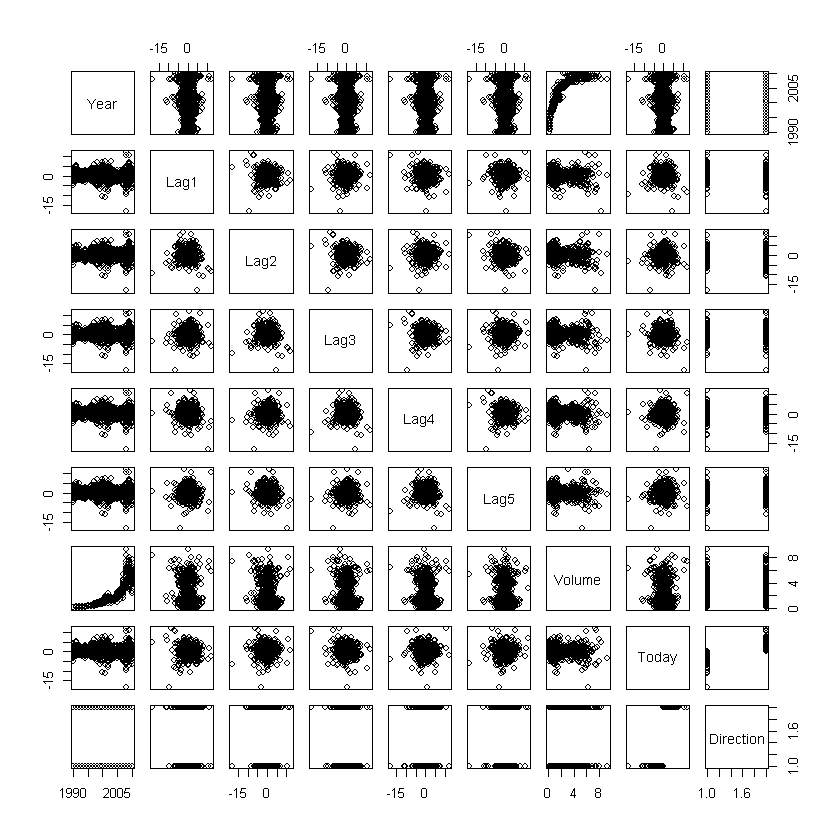

In [2]:
library(ISLR)
attach(Weekly)
pairs(Weekly)

In [3]:
table(Weekly$Direction)


Down   Up 
 484  605 

## b

In [4]:
logistic_reg <- glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data = Weekly, family = 'binomial')
summary(logistic_reg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


### There is only one significant predictor i.e Lag2 along with Intercept

## c

In [5]:
confusionMatrix(factor(ifelse(predict(logistic_reg, type = 'response')<0.5, 'Down', 'Up' )), Weekly$Direction, positive = 'Up')

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   54  48
      Up    430 557
                                         
               Accuracy : 0.5611         
                 95% CI : (0.531, 0.5908)
    No Information Rate : 0.5556         
    P-Value [Acc > NIR] : 0.369          
                                         
                  Kappa : 0.035          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9207         
            Specificity : 0.1116         
         Pos Pred Value : 0.5643         
         Neg Pred Value : 0.5294         
             Prevalence : 0.5556         
         Detection Rate : 0.5115         
   Detection Prevalence : 0.9063         
      Balanced Accuracy : 0.5161         
                                         
       'Positive' Class : Up             
                                         

### The Accuracy here its showing as 56.11%, but the model pridicted 430 observations as Up(False Positive) and only 54 out of 484 actual downs. This shows that the model is not predicting Actual Down obsevations

#### The model Predicted as follows:

In [6]:
table(factor(ifelse(predict(logistic_reg, type = 'response')<0.5, 'Down', 'Up' )))


Down   Up 
 102  987 

In [7]:
min(Year)
max(Year)

[1] 1990

[1] 2010

## d

In [8]:
train <- subset(Weekly, Year <= 2008)
test <-  subset(Weekly, Year >= 2009)

glm_1 <- glm(Direction ~ Lag2, data = Weekly, family = 'binomial')
summary(glm_1)

glm_pred <- factor(ifelse(predict(glm_1, test, type = 'response')<0.5, 'Down', 'Up' ))
confusionMatrix(glm_pred, test$Direction, positive = 'Up')

table(glm_pred)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.564  -1.267   1.008   1.086   1.386  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.21473    0.06123   3.507 0.000453 ***
Lag2         0.06279    0.02636   2.382 0.017230 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1490.4  on 1087  degrees of freedom
AIC: 1494.4

Number of Fisher Scoring iterations: 4


Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         

glm_pred
Down   Up 
  14   90 

## e

In [9]:
lda_model <- lda(Direction ~ Lag2, data = Weekly)
lda_model
lda_predicted <- predict(lda_model, test)

lda_predicted
confusionMatrix(lda_predicted$class, test$Direction, positive = 'Up')

table(lda_predicted$class)

Call:
lda(Direction ~ Lag2, data = Weekly)

Prior probabilities of groups:
     Down        Up 
0.4444444 0.5555556 

Group means:
            Lag2
Down -0.04042355
Up    0.30428099

Coefficients of linear discriminants:
           LD1
Lag2 0.4251523

,Down,Up
986,0.4727454,0.5272546
987,0.3461246,0.6538754
988,0.5155494,0.4844506
989,0.5166386,0.4833614
990,0.4795680,0.5204320
991,0.4577412,0.5422588
992,0.3688306,0.6311694
993,0.5211494,0.4788506
994,0.5530496,0.4469504
995,0.5169809,0.4830191


Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         


Down   Up 
  14   90 

## f

In [10]:
qda_model <- qda(Direction ~ Lag2, data = Weekly)
qda_model
qda_predicted <- predict(qda_model, test)

qda_predicted
confusionMatrix(qda_predicted$class, test$Direction, positive = 'Up')

table(qda_predicted$class)

Call:
qda(Direction ~ Lag2, data = Weekly)

Prior probabilities of groups:
     Down        Up 
0.4444444 0.5555556 

Group means:
            Lag2
Down -0.04042355
Up    0.30428099

,Down,Up
986,0.4773510,0.5226490
987,0.2769713,0.7230287
988,0.4837734,0.5162266
989,0.4835263,0.5164737
990,0.4804852,0.5195148
991,0.4676210,0.5323790
992,0.3305580,0.6694420
993,0.4822854,0.5177146
994,0.4634357,0.5365643
995,0.4834444,0.5165556


Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.5865          
         Neg Pred Value :    NaN          
             Prevalence : 0.5865          
         Detection Rate : 0.5865          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Up              
                              


Down   Up 
   0  104 

## g

In [11]:
library(class)

set.seed(123)
knn_model <- knn(train = data.frame(train[,'Lag2']),
                test = data.frame(test[,'Lag2']),
                cl = train$Direction,
                k = 1)

print('Confusion Matrix:')
table(knn_model, test$Direction)

table(knn_model)

[1] "Confusion Matrix:"


         
knn_model Down Up
     Down   21 29
     Up     22 32

knn_model
Down   Up 
  50   54 

# h

### Looking at the models accuracy and confusion matrix LDA and Logistic Regression models are the best models

# Question 11
## a

In [12]:
library(ISLR)

In [13]:
attach(Auto)

The following object is masked from package:ggplot2:

    mpg




In [14]:
median(Auto$mpg)

[1] 22.75

In [15]:
Auto <- Auto %>% 
mutate(mpg01 = ifelse(Auto$mpg >= median(Auto$mpg), 1,0))

In [16]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


In [17]:
table(Auto$mpg01)


  0   1 
196 196 

In [18]:
Auto$mpg01 <- factor(Auto$mpg01)

In [19]:
Auto$origin <- factor(Auto$origin)

In [20]:
colnames(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "mpg01"

## b

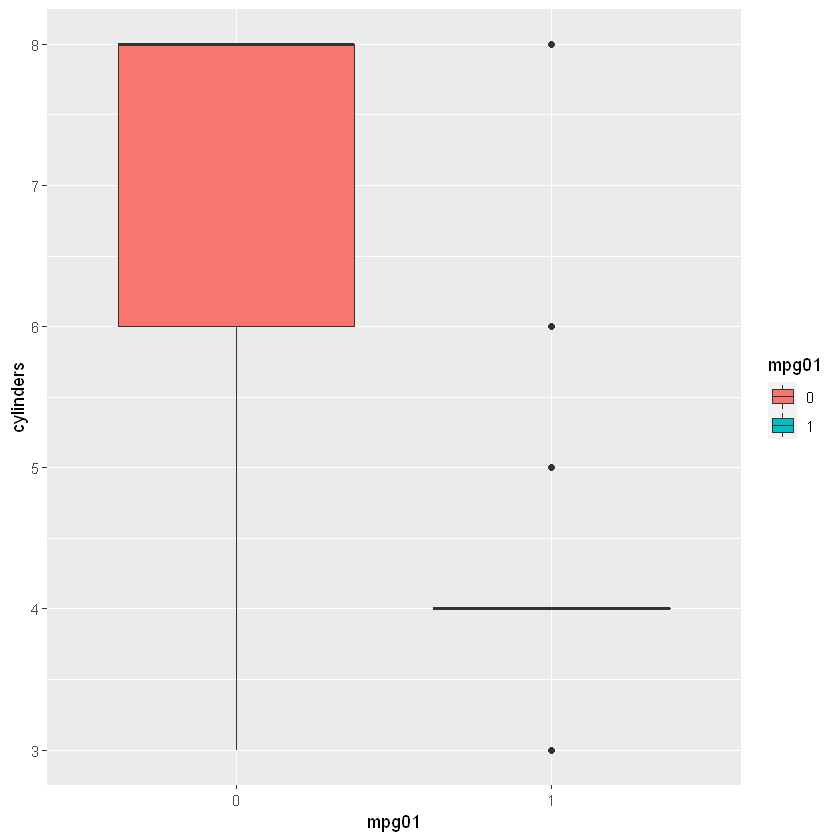

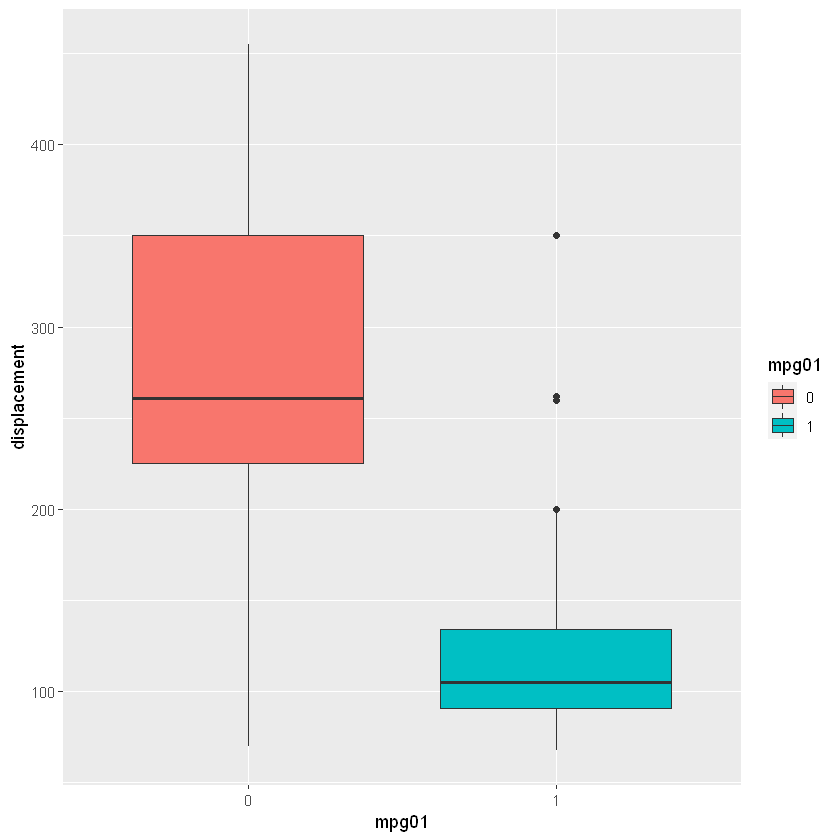

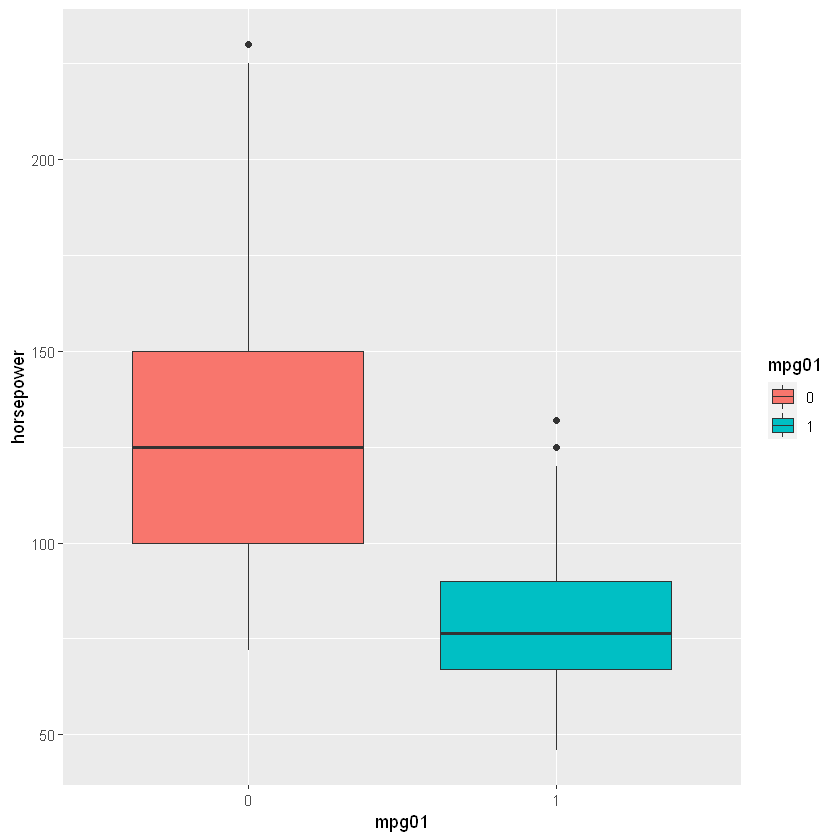

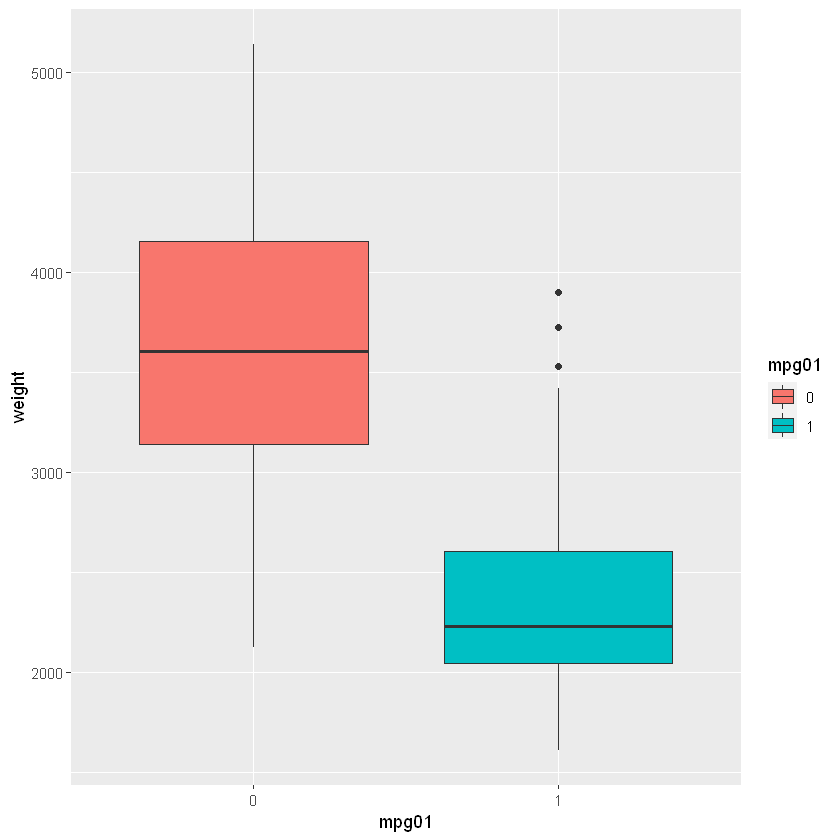

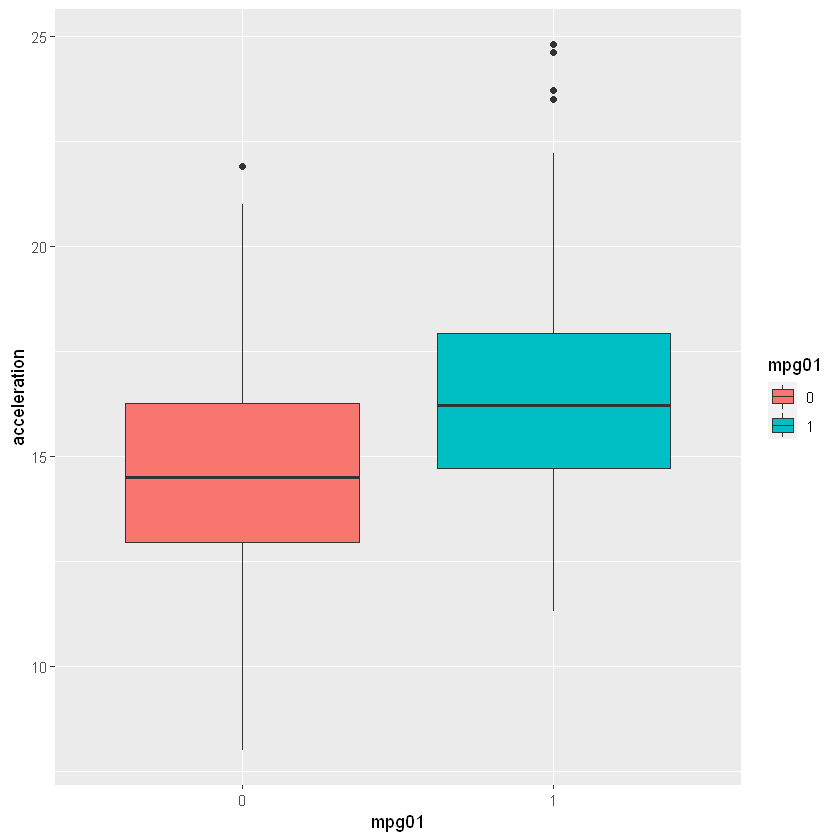

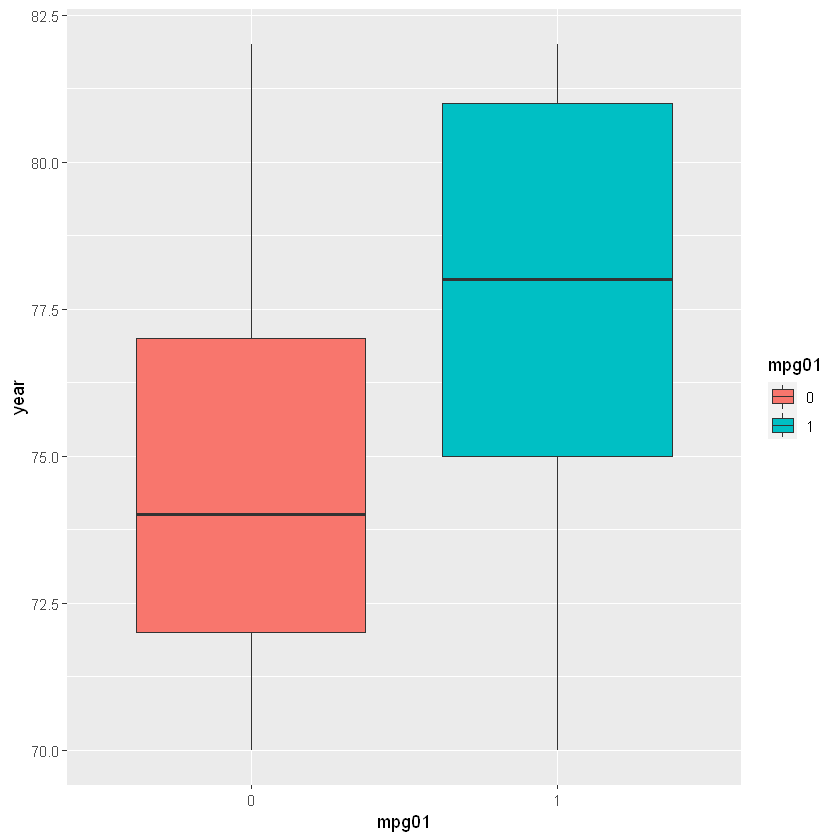

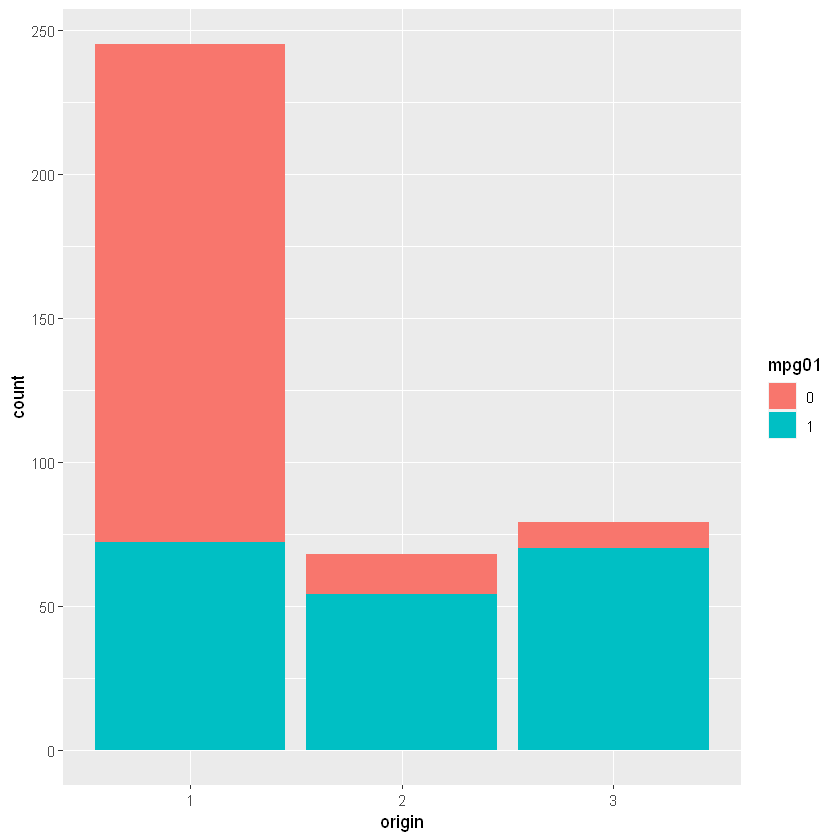

In [21]:

ggplot(Auto, aes(x= mpg01, y = cylinders, fill = mpg01))+
geom_boxplot()


ggplot(Auto, aes(x= mpg01, y = displacement, fill = mpg01))+
geom_boxplot()


ggplot(Auto, aes(x= mpg01, y = horsepower, fill = mpg01))+
geom_boxplot()


ggplot(Auto, aes(x= mpg01, y = weight, fill = mpg01))+
geom_boxplot()


ggplot(Auto, aes(x= mpg01, y = acceleration, fill = mpg01))+
geom_boxplot()


ggplot(Auto, aes(x= mpg01, y = year, fill = mpg01))+
geom_boxplot()

#ggplot(Auto, aes(x= mpg01, y = origin, fill = mpg01))+
#geom_boxplot()

ggplot(Auto, aes(x= origin, fill = mpg01))+
geom_bar()





### Looking at each graphs, I feel cylinders, displacement, horsepower and weight are strongest predictors for mpg01

## c

In [22]:
train_ind <- createDataPartition(Auto$mpg01,p=0.6,list=FALSE)

train <- Auto[train_ind, ]
test <- Auto[-train_ind, ]

#train_ind

nrow(train)
nrow(test)

[1] 236

[1] 156

## d

In [23]:
auto_lda <- lda(mpg01 ~ cylinders+displacement+horsepower+weight, data=Auto)

auto_lda 

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  cylinders displacement horsepower   weight
0  6.765306     273.1582  130.11224 3620.403
1  4.178571     115.6658   78.82653 2334.765

Coefficients of linear discriminants:
                       LD1
cylinders    -0.4708126926
displacement -0.0014339977
horsepower    0.0044241441
weight       -0.0009846242

In [24]:
lda_train <- predict(auto_lda, train)
confusionMatrix(lda_train$class, train$mpg01)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  99   9
         1  19 109
                                          
               Accuracy : 0.8814          
                 95% CI : (0.8331, 0.9197)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7627          
                                          
 Mcnemar's Test P-Value : 0.08897         
                                          
            Sensitivity : 0.8390          
            Specificity : 0.9237          
         Pos Pred Value : 0.9167          
         Neg Pred Value : 0.8516          
             Prevalence : 0.5000          
         Detection Rate : 0.4195          
   Detection Prevalence : 0.4576          
      Balanced Accuracy : 0.8814          
                                          
       'Positive' Class : 0               
                              

In [25]:
lda_test <- predict(auto_lda, test)

confusionMatrix(lda_test$class, test$mpg01)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68  3
         1 10 75
                                          
               Accuracy : 0.9167          
                 95% CI : (0.8617, 0.9549)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8333          
                                          
 Mcnemar's Test P-Value : 0.09609         
                                          
            Sensitivity : 0.8718          
            Specificity : 0.9615          
         Pos Pred Value : 0.9577          
         Neg Pred Value : 0.8824          
             Prevalence : 0.5000          
         Detection Rate : 0.4359          
   Detection Prevalence : 0.4551          
      Balanced Accuracy : 0.9167          
                                          
       'Positive' Class : 0               
                                    

### by looking at the confusion matrix, there are 16 observations which are predicted falsely,
### so the test error is 16/156 = 0.102

## e

In [26]:
auto_qda <- qda(mpg01 ~ cylinders+displacement+horsepower+weight, data=Auto)

auto_qda 

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = Auto)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
  cylinders displacement horsepower   weight
0  6.765306     273.1582  130.11224 3620.403
1  4.178571     115.6658   78.82653 2334.765

In [27]:
qda_train <- predict(auto_qda, train)

confusionMatrix(qda_train$class, train$mpg01)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 104  15
         1  14 103
                                          
               Accuracy : 0.8771          
                 95% CI : (0.8283, 0.9161)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7542          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8814          
            Specificity : 0.8729          
         Pos Pred Value : 0.8739          
         Neg Pred Value : 0.8803          
             Prevalence : 0.5000          
         Detection Rate : 0.4407          
   Detection Prevalence : 0.5042          
      Balanced Accuracy : 0.8771          
                                          
       'Positive' Class : 0               
                              

In [28]:
qda_test <- predict(auto_qda, test)

confusionMatrix(qda_test$class, test$mpg01)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 69  4
         1  9 74
                                          
               Accuracy : 0.9167          
                 95% CI : (0.8617, 0.9549)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8333          
                                          
 Mcnemar's Test P-Value : 0.2673          
                                          
            Sensitivity : 0.8846          
            Specificity : 0.9487          
         Pos Pred Value : 0.9452          
         Neg Pred Value : 0.8916          
             Prevalence : 0.5000          
         Detection Rate : 0.4423          
   Detection Prevalence : 0.4679          
      Balanced Accuracy : 0.9167          
                                          
       'Positive' Class : 0               
                                    

### by looking at the confusion matrix, there are 16 observations which are predicted falsely,
### so the test error is 16/156 = 0.102

## f

In [29]:
auto_glm <- glm(mpg01 ~ cylinders+displacement+horsepower+weight, data = train, family = 'binomial')
summary(auto_glm)

glm_pred <- factor(ifelse(predict(auto_glm, test)<0.5, 0, 1 ))
#confusionMatrix(glm_pred, test$mpg01)

confusionMatrix(glm_pred, test$mpg01)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4498  -0.2891   0.0524   0.3954   3.2919  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  10.6333380  2.0205243   5.263 1.42e-07 ***
cylinders     0.1361301  0.4527745   0.301   0.7637    
displacement -0.0164796  0.0101176  -1.629   0.1034    
horsepower   -0.0340747  0.0172017  -1.981   0.0476 *  
weight       -0.0018228  0.0008044  -2.266   0.0234 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 327.17  on 235  degrees of freedom
Residual deviance: 135.38  on 231  degrees of freedom
AIC: 145.38

Number of Fisher Scoring iterations: 7


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 70  5
         1  8 73
                                          
               Accuracy : 0.9167          
                 95% CI : (0.8617, 0.9549)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8333          
                                          
 Mcnemar's Test P-Value : 0.5791          
                                          
            Sensitivity : 0.8974          
            Specificity : 0.9359          
         Pos Pred Value : 0.9333          
         Neg Pred Value : 0.9012          
             Prevalence : 0.5000          
         Detection Rate : 0.4487          
   Detection Prevalence : 0.4808          
      Balanced Accuracy : 0.9167          
                                          
       'Positive' Class : 0               
                                    

### by looking at the confusion matrix, there are 14 observations which are predicted falsely,
### so the test error is 14/156 = 0.0897

### g

In [41]:
library(class)

set.seed(123)
knn_model <- knn(train = data.frame(train[,c('cylinders','displacement','horsepower','weight')]),
                test = data.frame(test[, c('cylinders','displacement','horsepower','weight')]),
                cl = train$mpg01,
                k = 76)
print('Confusion Matrix:')
table(knn_model, test$mpg01)

[1] "Confusion Matrix:"


         
knn_model  0  1
        0 67  5
        1 11 73

### k = 76, test error = 16/156 = 0.096